<a href="https://www.kaggle.com/code/andreacamilloni/yolo-blood-cell?scriptVersionId=110196356" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import os

In [3]:
import wandb
wandb.login()

wandb: Currently logged in as: andreacamilloni (use `wandb login --relogin` to force relogin)


True

In [4]:
annotation = pd.read_csv("../input/bloodcellsyolodataset/annotations_df.csv",sep=';')
annotation.head()

,Unnamed: 0,prev_filename,filename,cell_type,xmin,xmax,ymin,ymax
0,0,BloodImage_00000.jpg,0.jpg,WBC,260,491,177,376
1,1,BloodImage_00000.jpg,0.jpg,RBC,78,184,336,435
2,2,BloodImage_00000.jpg,0.jpg,RBC,63,169,237,336
3,3,BloodImage_00000.jpg,0.jpg,RBC,214,320,362,461
4,4,BloodImage_00000.jpg,0.jpg,RBC,414,506,352,445


In [5]:
images = annotation.prev_filename.unique()
#test_images = annotation_test.prev_filename.unique()

In [6]:
train = int(images.shape[0]*0.5)
valid = int(images.shape[0]*0.8)

In [7]:
train_images = images[:train]
valid_images = images[train:valid]
test_images = images[valid:]

In [8]:
annotation.groupby(by="cell_type").count()

,Unnamed: 0,prev_filename,filename,xmin,xmax,ymin,ymax
cell_type,,,,,,,
Platelets,361,361,361,361,361,361,361
RBC,4155,4155,4155,4155,4155,4155,4155
WBC,372,372,372,372,372,372,372


In [9]:
yolo_train_dir = "/kaggle/working/yolo/train"
yolo_valid_dir = "/kaggle/working/yolo/valid"
yolo_test_dir = "/kaggle/working/yolo/test"

for dd in [yolo_train_dir, yolo_valid_dir, yolo_test_dir]:
    for ss in ["images", "labels"]:
        print(os.path.join(dd, ss))
        os.makedirs(os.path.join(dd, ss), exist_ok=True)

/kaggle/working/yolo/train/images
/kaggle/working/yolo/train/labels
/kaggle/working/yolo/valid/images
/kaggle/working/yolo/valid/labels
/kaggle/working/yolo/test/images
/kaggle/working/yolo/test/labels


In [10]:
import glob
from tqdm import tqdm
import os
import cv2
import matplotlib.pyplot as plt


(480, 640, 3)


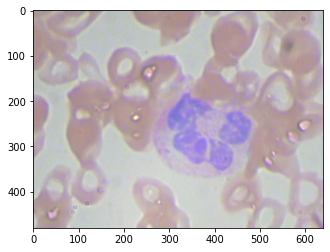

In [11]:
image = cv2.imread('../input/bloodcellsyolodataset/images/BloodImage_00000.jpg')
image = image[:,:,2::-1]
print(image.shape)
plt.imshow(image)

In [12]:
WIDTH = 640
HEIGHT = 480
cells_id = {
    'RBC': 0,
    'WBC': 1,
    'Platelets' : 2
}
"""
WIDTH_test = 256
HEIGHT_test = 256
cells_id_test = {
    'RBC': 0,
    'WBC': 1
}
"""

"\nWIDTH_test = 256\nHEIGHT_test = 256\ncells_id_test = {\n    'RBC': 0,\n    'WBC': 1\n}\n"

In [13]:
cells_classes = list(cells_id.keys())
#cells_classes_test = list(cells_id_test.keys())
cells_classes

['RBC', 'WBC', 'Platelets']

In [14]:
for image in train_images:
    lables_file = os.path.join(yolo_train_dir, 'labels', image.replace(".jpg", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotation.loc[annotation.prev_filename == image].values:

            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[3]],
                ((box[5]+box[4])/2.0) / WIDTH,
                ((box[7]+box[6])/2.0) / HEIGHT,
                (box[5]-box[4]) / WIDTH,
                (box[7]-box[6]) / HEIGHT
            ))
        
for image in valid_images:
    lables_file = os.path.join(yolo_valid_dir, 'labels', image.replace(".jpg", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotation.loc[annotation.prev_filename == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[3]],
                ((box[5]+box[4])/2.0) / WIDTH,
                ((box[7]+box[6])/2.0) / HEIGHT,
                (box[5]-box[4]) / WIDTH,
                (box[7]-box[6]) / HEIGHT
            ))

for image in test_images:
    lables_file = os.path.join(yolo_test_dir, 'labels', image.replace(".jpg", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotation.loc[annotation.prev_filename == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[3]],
                ((box[5]+box[4])/2.0) / WIDTH,
                ((box[7]+box[6])/2.0) / HEIGHT,
                (box[5]-box[4]) / WIDTH,
                (box[7]-box[6]) / HEIGHT
            ))
"""            
for image in test_images:
    lables_file = os.path.join(yolo_test_dir, 'labels', image.replace(".png", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotation.loc[annotation.prev_filename == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id_test[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH_test,
                ((box[4]+box[2])/2.0) / HEIGHT_test,
                (box[3]-box[1]) / WIDTH_test,
                (box[4]-box[2]) / HEIGHT_test
            ))
"""

'            \nfor image in test_images:\n    lables_file = os.path.join(yolo_test_dir, \'labels\', image.replace(".png", ".txt"))\n    with open(lables_file, "w") as wobj:\n        for box in annotation.loc[annotation.prev_filename == image].values:\n            wobj.write("%d %f %f %f %f \n" % (\n                cells_id_test[box[5]],\n                ((box[3]+box[1])/2.0) / WIDTH_test,\n                ((box[4]+box[2])/2.0) / HEIGHT_test,\n                (box[3]-box[1]) / WIDTH_test,\n                (box[4]-box[2]) / HEIGHT_test\n            ))\n'

In [15]:
#YoloV3 paper:
#best possible accuracy/mAP 608 x 608 as input layer size in the config.
#good inference/speed at the cost of accuracy, 320 x 320
#balanced model, 416 x 416
SIZE_W = 608
SIZE_H = 608

In [16]:
SIZE = (SIZE_W, SIZE_H)

def replace_image(src_file, dst_file, size=SIZE):
    image = cv2.imread(src_file) 
    image = cv2.resize(image, size)
    cv2.imwrite(dst_file, image)

In [17]:
train_images_dir = "../input/bloodcellsyolodataset/images/"
#test_images_dir = "../input/blood-cell-detection-dataset/images"

for image in train_images:
    src_file = os.path.join(train_images_dir , image)
    dst_file = os.path.join(yolo_train_dir, 'images', image)
    replace_image(src_file, dst_file)
        
for image in valid_images:
    src_file = os.path.join(train_images_dir , image)
    dst_file = os.path.join(yolo_valid_dir, 'images', image)
    replace_image(src_file, dst_file)
    
for image in test_images:
    src_file = os.path.join(train_images_dir , image)
    dst_file = os.path.join(yolo_test_dir, 'images', image)
    replace_image(src_file, dst_file)

/kaggle/working/yolo/train/images/BloodImage_00000.jpg
/kaggle/working/yolo/train/labels/BloodImage_00000.txt


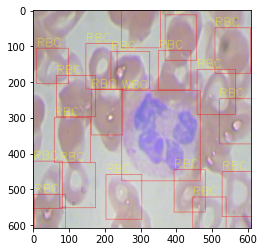

In [18]:
def draw_image(image_file, label_file, class_names):   
    image = cv2.imread(image_file)
        
    with open(label_file) as fobj:
        while True:            
            item = fobj.readline()
            if item is None or len(item)<=0:
                break
                
            item = item.split()
            
            lb = int(item[0])
            xc = float(item[1]) * SIZE_W
            yc = float(item[2]) * SIZE_H
            w = float(item[3]) * SIZE_W
            h = float(item[4]) * SIZE_H
        
            image = cv2.rectangle(image, (int(xc - w/2), int(yc - h/2)), (int(xc + w/2), int(yc + h/2)), (0,0,255), 1)
            image = cv2.putText(image, class_names[lb], (int(xc - w/2), int(yc - h/2 - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 255, 255), 1)
        
    return image

train_file = train_images[0]
image_file = os.path.join(yolo_train_dir, 'images', train_file)
label_file = os.path.join(yolo_train_dir, 'labels', train_file.replace(".jpg", ".txt"))
 
print(image_file)
print(label_file)

image = draw_image(image_file, label_file, cells_classes)
image = image[:,:,2::-1]
plt.imshow(image)


In [19]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt
%cd -

Cloning into 'yolov5'...
remote: Enumerating objects: 14483, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 14483 (delta 16), reused 28 (delta 9), pack-reused 14446
Receiving objects: 100% (14483/14483), 13.52 MiB | 27.53 MiB/s, done.
Resolving deltas: 100% (9987/9987), done.
/kaggle/working/yolov5
     |████████████████████████████████| 78 kB 2.4 MB/s eta 0:00:01
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.59.0
    Uninstalling tqdm-4.59.0:
      Successfully uninstalled tqdm-4.59.0
Note: you may need to restart the kernel to use updated packages.
/kaggle/working


In [20]:
yaml_file="yolov5/data/blood_cell.yaml"
train_images_dir = os.path.join("..", yolo_train_dir, "images")
val_images_dir = os.path.join("..", yolo_valid_dir, "images")
test_images_dir = os.path.join("..", yolo_test_dir, "images")


names_str=""
for item in cells_classes:
    names_str=names_str + ", \'%s\'"%item
names_str= "names: ["+names_str[1:]+"]"

with open(yaml_file, "w") as wobj:
    wobj.write("train: %s\n"%train_images_dir)
    wobj.write("val: %s\n"%val_images_dir)
    wobj.write("test: %s\n"%test_images_dir)
    wobj.write("nc: %d\n"%len(cells_classes))
    wobj.write(names_str+"\n")

In [21]:
!cat yolov5/data/blood_cell.yaml

train: /kaggle/working/yolo/train/images
val: /kaggle/working/yolo/valid/images
test: /kaggle/working/yolo/test/images
nc: 3
names: [ 'RBC', 'WBC', 'Platelets']


In [22]:
%cd yolov5
#!bash weights/download_weights.sh

/kaggle/working/yolov5


In [23]:
!mv *.pt weights
!ls weights

mv: cannot stat '*.pt': No such file or directory
ls: cannot access 'weights': No such file or directory


# Training

In [26]:
#!WANDB_MODE="dryrun" 
!python train.py --data data/blood_cell.yaml 
                --batch-size 8 
                --epochs 350 
                --img-size 608 
                --project runs/train 
                --name blood_cell 
                --device 0 
                --cfg models/hub/yolov3.yaml 
                --patience 50 
                    #--weights weights/yolov3.pt 

train: weights=yolov5s.pt, cfg=models/hub/yolov3.yaml, data=data/blood_cell.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=350, batch_size=8, imgsz=608, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=blood_cell, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=50, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-226-gfde7758 Python-3.7.10 torch-1.7.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gam

# Test 1 - Metrics Test set

In [27]:
!python val.py   --data data/blood_cell.yaml \
                \--task test --weights runs/train/blood_cell/weights/best.pt \
                \--save-txt \
                \--device 0 \
                \--img-size 608

val: data=data/blood_cell.yaml, weights=['runs/train/blood_cell/weights/best.pt'], batch_size=32, imgsz=608, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-226-gfde7758 Python-3.7.10 torch-1.7.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
yolov3 summary: 190 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
test: Scanning '/kaggle/working/yolo/test/labels' images and labels...73 found, 
test: New cache created: /kaggle/working/yolo/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   
                   all         73       1041      0.854      0.922      0.936      0.592
                   RBC         73        908      0.816      0.915       0.92      0.637
                   WBC         73       

# Test 2 - Inference

In [28]:
!python detect.py   --weights runs/train/blood_cell/weights/best.pt \
                    \--source /kaggle/working/yolo/test/images/BloodImage_00331.jpg \
                    \--name blood_cell \
                    \--project runs/detect \
                    \--img-size 608

detect: weights=['runs/train/blood_cell/weights/best.pt'], source=/kaggle/working/yolo/test/images/BloodImage_00331.jpg, data=data/coco128.yaml, imgsz=[608, 608], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=blood_cell, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-226-gfde7758 Python-3.7.10 torch-1.7.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
yolov3 summary: 190 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
image 1/1 /kaggle/working/yolo/test/images/BloodImage_00331.jpg: 608x608 27 RBCs, 1 WBC, 1 Platelets, 30.8ms
Speed: 0.5ms pre-process, 30.8ms inference, 1.6ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/blood_cell


In [30]:
!ls -l runs/detect/blood_cell

total 172
-rw-r--r-- 1 root root 174250 Nov  6 12:46 BloodImage_00331.jpg


/kaggle/working/yolo/test/images/BloodImage_00331.jpg
/kaggle/working/yolo/test/labels/BloodImage_00331.txt


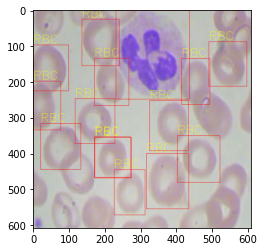

In [31]:
test_file = test_images[1]
image_file = os.path.join(yolo_test_dir, 'images', test_file)
label_file = os.path.join(yolo_test_dir, 'labels', test_file.replace(".jpg", ".txt"))
 
print(image_file)
print(label_file)

image = draw_image(image_file, label_file, cells_classes)
image = image[:,:,2::-1]
plt.imshow(image)

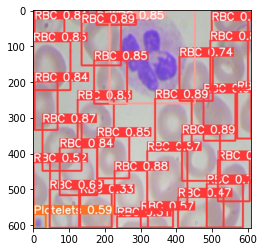

In [32]:
img = cv2.imread("runs/detect/blood_cell/BloodImage_00331.jpg")
plt.imshow(img[:,:,2::-1]);

Text(0.5, 1.0, 'Predictions')

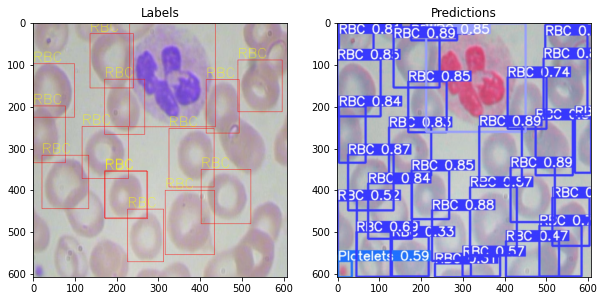

In [33]:
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 2, 1)
plt.imshow(image)
plt.title("Labels")

fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title("Predictions")

In [35]:
import torch

model = torch.hub.load('/kaggle/working/yolov5', 'custom', path='runs/train/blood_cell/weights/best.pt', source='local')
# Images
imgs = ['/kaggle/working/yolo/test/images/BloodImage_00331.jpg']  # batch of images

# Inference
results = model(imgs,size=608)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0] 

requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.2-226-gfde7758 Python-3.7.10 torch-1.7.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
yolov3 summary: 190 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
Adding AutoShape... 
image 1/1: 608x608 27 RBCs, 1 WBC, 1 Platelets
Speed: 6.9ms pre-process, 35.8ms inference, 3.3ms NMS per image at shape (1, 3, 608, 608)
Saved 1 image to runs/detect/exp


,xmin,ymin,xmax,ymax,confidence,class,name
0,414.663086,345.652527,520.884094,475.686829,0.893841,0,RBC
1,339.496765,245.549973,441.506714,381.596497,0.892585,0,RBC
2,135.281067,9.869820,244.723511,153.682220,0.890492,0,RBC
3,226.897705,446.459015,318.198608,568.518799,0.875569,0,RBC
4,317.780518,392.021454,429.992310,554.925293,0.874440,0,RBC
5,25.519417,314.190277,134.812073,447.749420,0.868791,0,RBC
6,494.171173,84.407303,598.817261,218.547562,0.858418,0,RBC
7,170.223724,138.863022,261.885681,261.189514,0.854958,0,RBC
8,212.721985,0.000000,451.256958,260.127441,0.853395,1,WBC
9,178.182953,352.086578,267.989166,468.671844,0.853345,0,RBC
